#### ДЗ №4

Переименовать поля (conversion -> target, offer -> treatment) и привести поле treatment к бинарному виду (1 или 0, т.е было какое-то предложение или нет) - значение No Offer означает отсутствие коммуникации, а все остальные - наличие.

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df = pd.read_csv('/home/vyacheslav/Рабочий стол/Data Scientist/IV ЧЕТВЕРТЬ/I. Машинное обучение в бизнесе/4 lesson/archive/data.csv', ',')
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,offer,conversion
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [3]:
df.rename(columns={'conversion': 'target', 'offer': 'treatment'}, inplace=True)

In [4]:
df

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,Buy One Get One,0
1,6,329.08,1,1,Rural,1,Web,No Offer,0
2,7,180.65,0,1,Surburban,1,Web,Buy One Get One,0
3,9,675.83,1,0,Rural,1,Web,Discount,0
4,2,45.34,1,0,Urban,0,Web,Buy One Get One,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,Discount,0
63996,5,38.91,0,1,Urban,1,Phone,Discount,0
63997,6,29.99,1,0,Urban,1,Phone,Discount,0
63998,1,552.94,1,0,Surburban,1,Multichannel,Buy One Get One,0


In [5]:
df['treatment'].unique()

array(['Buy One Get One', 'No Offer', 'Discount'], dtype=object)

In [6]:
df.loc[df['treatment'] == 'No Offer', 'treatment'] = 0

In [7]:
df.loc[df['treatment'] == 'Buy One Get One', 'treatment'] = 1

In [8]:
df.loc[df['treatment'] == 'Discount', 'treatment'] = 1

In [9]:
df.to_csv('/home/vyacheslav/Рабочий стол/Data Scientist/IV ЧЕТВЕРТЬ/I. Машинное обучение в бизнесе/4 lesson/archive/data2.csv')

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [2]:
df1 = pd.read_csv('/home/vyacheslav/Рабочий стол/Data Scientist/IV ЧЕТВЕРТЬ/I. Машинное обучение в бизнесе/4 lesson/archive/data2.csv')
df1.drop(['Unnamed: 0'], axis='columns', inplace=True)
df1

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,target
0,10,142.44,1,0,Surburban,0,Phone,1,0
1,6,329.08,1,1,Rural,1,Web,0,0
2,7,180.65,0,1,Surburban,1,Web,1,0
3,9,675.83,1,0,Rural,1,Web,1,0
4,2,45.34,1,0,Urban,0,Web,1,0
...,...,...,...,...,...,...,...,...,...
63995,10,105.54,1,0,Urban,0,Web,1,0
63996,5,38.91,0,1,Urban,1,Phone,1,0
63997,6,29.99,1,0,Urban,1,Phone,1,0
63998,1,552.94,1,0,Surburban,1,Multichannel,1,0


Cделать разбиение набора данных не тренировочную и тестовую выборки

In [3]:
df1.columns

Index(['recency', 'history', 'used_discount', 'used_bogo', 'zip_code',
       'is_referral', 'channel', 'treatment', 'target'],
      dtype='object')

In [4]:
col1 = ['zip_code', 'channel', 'target']
col = list(set(df1.columns) - set(col1))
col

['used_discount',
 'used_bogo',
 'treatment',
 'is_referral',
 'recency',
 'history']

In [5]:
X_train, X_test, y_train, y_test = train_test_split(df1.drop('target', 1), df1['target'], random_state=42)

In [6]:
def transform_data(data):
    for i1, col1 in enumerate(col):
        data[col1 + '_log'] = np.log(data[col1] + 1.1)
        data[col1 + '_exp'] = np.exp(data[col1] + 1.1)
        
        for i2, col2 in enumerate(col):
            data['%s_%s_1' % (col1, col2)] = data[col1] - data[col2]
            data['%s_%s_2' % (col1, col2)] = data[col1] + data[col2]
            data['%s_%s_3' % (col1, col2)] = data[col1] / (data[col2] + 0.1)
            data['%s_%s_4' % (col1, col2)] = data[col1] * data[col2]
            data['%s_%s_5' % (col1, col2)] = data[col1] ** data[col2]
            
            data['%s_%s_11' % (col1, col2)] = data[col1] - np.log(data[col2] + 1)
            data['%s_%s_22' % (col1, col2)] = data[col1] + np.log(data[col2] + 1)
            data['%s_%s_33' % (col1, col2)] = data[col1] / (np.log(data[col2] + 1) + 0.1)
            data['%s_%s_44' % (col1, col2)] = data[col1] * np.log(data[col2] + 1)
            data['%s_%s_55' % (col1, col2)] = data[col1] ** np.log(data[col2] + 1)
            
    return data

In [7]:
X_train_tr = transform_data(X_train)

/home/vyacheslav/.local/lib/python3.8/site-packages/pandas/core/arraylike.py:274: RuntimeWarning: overflow encountered in exp
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [8]:
X_test_tr = transform_data(X_test)

In [9]:
X_val = X_test_tr
y_val = y_test

In [10]:
treat_train, treat_val = train_test_split(df1['treatment'], random_state=42)

In [46]:
treat_train = X_train_tr.loc[X_train_tr.index, 'treatment']
treat_test = X_test_tr.loc[X_test_tr.index, 'treatment']

In [47]:
y_test

33042    0
7209     0
24367    0
19599    1
31465    1
        ..
37308    0
16162    0
23295    0
7789     0
27093    0
Name: target, Length: 16000, dtype: int64

In [48]:
# Инструкция по установке пакета: https://github.com/maks-sh/scikit-uplift
# Ссылка на документацию: https://scikit-uplift.readthedocs.io/en/latest/
from sklift.metrics import uplift_at_k
from sklift.viz import plot_uplift_preds
from sklift.models import SoloModel

# sklift поддерживает любые модели, 
# которые удовлетворяют соглашениями scikit-learn
# Для примера воспользуемся catboost
from catboost import CatBoostClassifier


### 1 модель

In [49]:
cat_features = ['zip_code', 'channel']

models_results = {
    'approach': [],
    'uplift@30%': []
}

array([<AxesSubplot:title={'center':'Treatment predictions'}, ylabel='Probability hist'>,
       <AxesSubplot:title={'center':'Control predictions'}>,
       <AxesSubplot:title={'center':'Uplift predictions'}>], dtype=object)

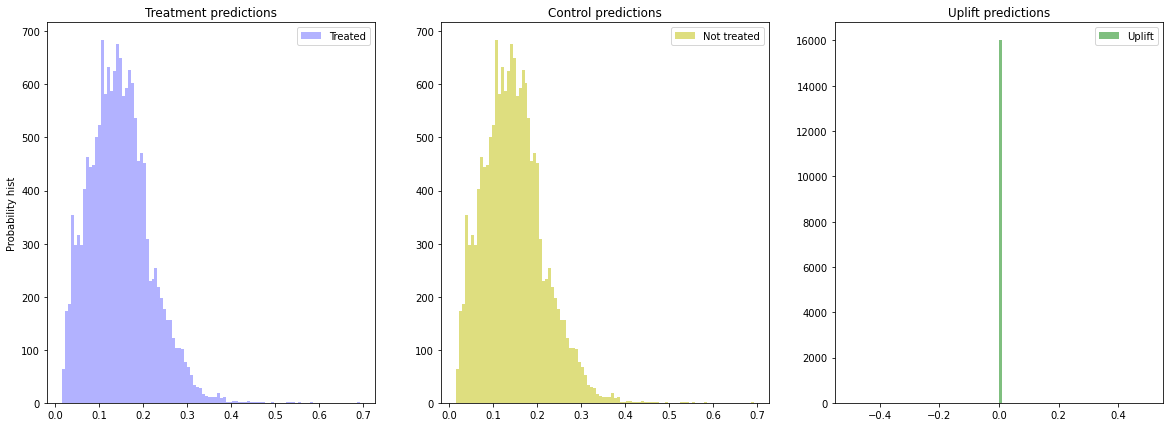

In [50]:
sm = SoloModel(CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True))
sm = sm.fit(X_train_tr, y_train, treat_train, estimator_fit_params={'cat_features': cat_features})

uplift_sm = sm.predict(X_val)

sm_score = uplift_at_k(y_true=y_val, uplift=uplift_sm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('SoloModel')
models_results['uplift@30%'].append(sm_score)

# Получим условные вероятности выполнения целевого действия при взаимодействии для каждого объекта
sm_trmnt_preds = sm.trmnt_preds_
# И условные вероятности выполнения целевого действия без взаимодействия для каждого объекта
sm_ctrl_preds = sm.ctrl_preds_

# Отрисуем распределения вероятностей и их разность (uplift)
plot_uplift_preds(trmnt_preds=sm_trmnt_preds, ctrl_preds=sm_ctrl_preds)

Посмотрим на топ-признаки

In [51]:
sm_fi = pd.DataFrame({
    'feature_name': sm.estimator.feature_names_,
    'feature_score': sm.estimator.feature_importances_
}).sort_values('feature_score', ascending=False).reset_index(drop=True)

sm_fi

,feature_name,feature_score
0,treatment_treatment_4,16.175056
1,channel,6.062234
2,treatment_is_referral_2,5.775772
3,zip_code,5.513708
4,recency_is_referral_2,4.400789
...,...,...
375,treatment_exp,0.000000
376,treatment_log,0.000000
377,used_bogo_history_55,0.000000
378,used_bogo_history_22,0.000000


### 1 модель с трансформацией таргета

array([<AxesSubplot:title={'center':'Treatment predictions'}, ylabel='Probability hist'>,
       <AxesSubplot:title={'center':'Control predictions'}>,
       <AxesSubplot:title={'center':'Uplift predictions'}>], dtype=object)

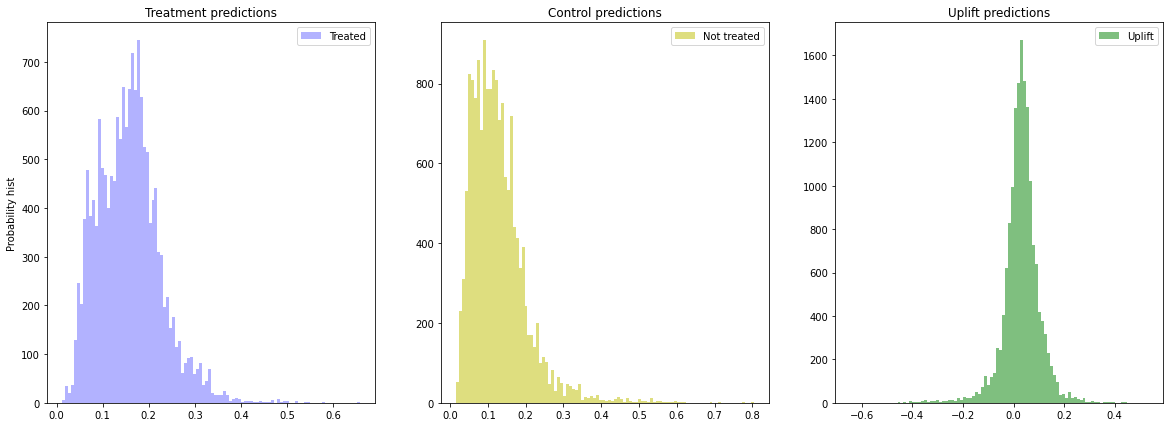

In [52]:
from sklift.models import TwoModels


tm = TwoModels(
    estimator_trmnt=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    estimator_ctrl=CatBoostClassifier(iterations=20, thread_count=2, random_state=42, silent=True), 
    method='vanilla'
)
tm = tm.fit(
    X_train, y_train, treat_train,
    estimator_trmnt_fit_params={'cat_features': cat_features}, 
    estimator_ctrl_fit_params={'cat_features': cat_features}
)

uplift_tm = tm.predict(X_val)

tm_score = uplift_at_k(y_true=y_val, uplift=uplift_tm, treatment=treat_val, strategy='by_group', k=0.3)

models_results['approach'].append('TwoModels')
models_results['uplift@30%'].append(tm_score)

plot_uplift_preds(trmnt_preds=tm.trmnt_preds_, ctrl_preds=tm.ctrl_preds_)

Посмотрим на результаты

In [53]:
pd.DataFrame(data=models_results).sort_values('uplift@30%', ascending=False)

,approach,uplift@30%
1,TwoModels,0.103183
0,SoloModel,0.064062


### Вариант с деревом решений

In [54]:
X_train_tr

,recency,history,used_discount,used_bogo,zip_code,is_referral,channel,treatment,used_discount_log,used_discount_exp,...,history_history_1,history_history_2,history_history_3,history_history_4,history_history_5,history_history_11,history_history_22,history_history_33,history_history_44,history_history_55
7517,6,92.45,0,1,Urban,0,Web,0,0.095310,3.004166,...,0.0,184.90,0.998920,8547.0025,5.598792e+181,87.912573,96.987427,19.935626,419.485083,8.320668e+08
5343,1,796.97,0,1,Rural,1,Multichannel,1,0.095310,3.004166,...,0.0,1593.94,0.999875,635161.1809,inf,790.287929,803.652071,117.511303,5325.410127,2.441413e+19
35537,7,390.14,0,1,Urban,1,Phone,1,0.095310,3.004166,...,0.0,780.28,0.999744,152209.2196,inf,384.170934,396.109066,64.283372,2328.771235,2.932006e+15
63983,2,83.03,0,1,Urban,0,Phone,0,0.095310,3.004166,...,0.0,166.06,0.998797,6893.9809,2.259879e+159,78.598826,87.461174,18.324170,367.920367,3.194951e+08
45287,10,734.90,1,0,Rural,1,Multichannel,1,0.741937,8.166170,...,0.0,1469.80,0.999864,540078.0100,inf,728.298906,741.501094,109.668656,4851.144157,8.322289e+18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
62570,3,276.21,0,1,Urban,0,Phone,1,0.095310,3.004166,...,0.0,552.42,0.999638,76291.9641,inf,270.585225,281.834775,48.248182,1553.619197,5.387945e+13
38158,4,43.49,0,1,Urban,0,Phone,1,0.095310,3.004166,...,0.0,86.98,0.997706,1891.3801,1.792897e+71,39.694736,47.285264,11.164839,165.056051,1.652422e+06
860,8,492.53,1,1,Rural,1,Phone,1,0.741937,8.166170,...,0.0,985.06,0.999797,242585.8009,inf,486.328416,498.731584,78.159718,3054.465994,4.981344e+16
15795,5,72.28,1,0,Urban,1,Web,1,0.741937,8.166170,...,0.0,144.56,0.998618,5224.3984,2.343319e+134,67.985712,76.574288,16.448627,310.391116,9.619639e+07


In [55]:
X_train_tree = pd.concat([X_train_tr.drop('treatment', 1), 
                          pd.get_dummies(X_train_tr['treatment'], prefix='treatment')], 1)
features = [col for col in X_train_tree]

In [58]:
# %%time
from IPython.display import Image
from causalml.inference.tree import UpliftTreeClassifier, UpliftRandomForestClassifier
from causalml.inference.tree import uplift_tree_string, uplift_tree_plot

# from sklearn.utils import testing

uplift_model = UpliftTreeClassifier(max_depth=8, min_samples_leaf=200, min_samples_treatment=50,
                                    n_reg=100, evaluationFunction='KL', control_name='control')

uplift_model.fit(X_train_tree.values,
                 treatment=treat_train.map({1: 'treatment1', 0: 'control'}).values,
                 y=y_train)

# graph = uplift_tree_plot(uplift_model.fitted_uplift_tree, features)
# Image(graph.create_png())

ModuleNotFoundError: No module named 'sklearn.utils.testing'